In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [2]:
def check_hypothesis(p_value, alpha=0.05):
    print(f"p_value: {p_value}, alpha: {alpha}")
    if p_value < alpha:
        print('Reject the NULL Hypothesis')
    else:
        print('Failed to Reject the NULL Hypothesis')

### Zingaro

In [3]:
# reading the data
zingaro_df = pd.read_csv('./Zingaro_Company.csv')
zingaro_df.sample(5)

,Unpolished,Treated and Polished
59,105.371885,152.013506
8,102.004519,163.384427
13,147.366647,159.012005
44,145.179009,167.526834
62,178.079431,154.415525


In [4]:
zingaro_df.shape

(75, 2)

In [5]:
zingaro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


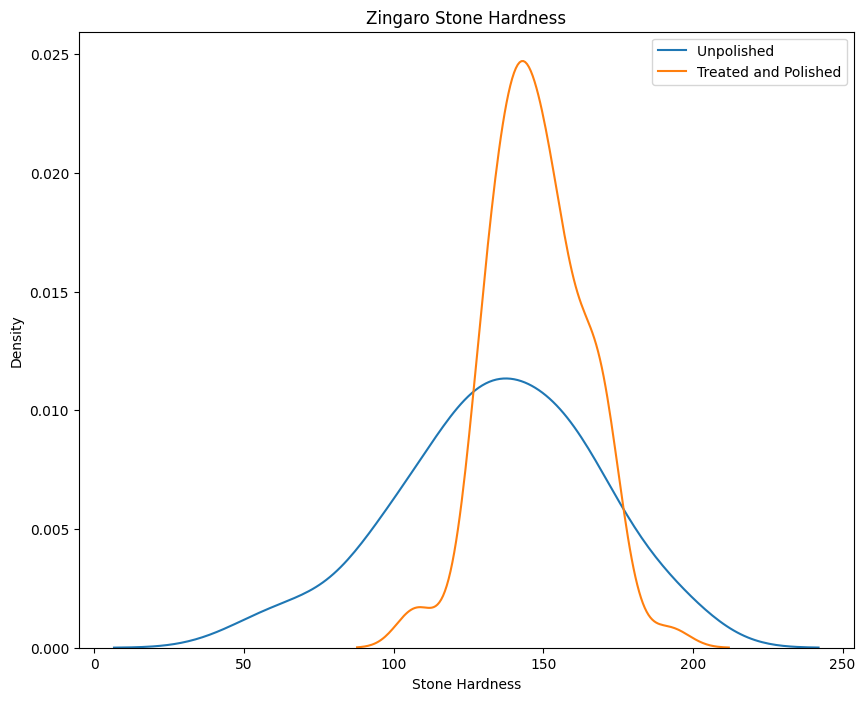

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
for i in zingaro_df.columns:
    sns.kdeplot(data=zingaro_df, x=i, ax=ax)
plt.legend(zingaro_df.columns)
plt.title('Zingaro Stone Hardness')
plt.xlabel('Stone Hardness')
plt.show();

#### 1.1 Hardness Level to be atleast 150 for unpolished stones

Stating the Null and Alternate Hypothesis:-</br>
As the claim is that the hardness of unpolished stones is not adequate for printing, our Null hypothesis would be that the unpolished stones are alright for printing, i.e. mean to be at least 150. The Alternate hypothesis would be that the unpolished stones are not good for printing i.e. mean to be less than 150. We need to conduct a One-Tailed One Sample t Test.</br>
***
H<sub>0</sub>: $\mu$ >= 150</br>
H<sub>a</sub>: $\mu$ < 150
</br>
</br>
__$\alpha$ = 0.05__

In [7]:
alpha = 0.05
t, p_value = stats.ttest_1samp(
    zingaro_df['Unpolished '], # sample
    popmean=150, # mean to be compared against
    alternative='less' # 1-tailed test
)
check_hypothesis(p_value, alpha)

p_value: 4.1712869974196533e-05, alpha: 0.05
Reject the NULL Hypothesis


#### Conclusion
<b>We reject the Null hypothesis and hence, Zingaro's belief about the stones are not suitable for printing is correct.</b>

#### 1.2 Mean of Unpolished and Polished stones is same

Stating the Null and Alternate Hypothesis:-</br>
Is the mean of unpolished and polished hardness same? To find this, we need to conduct a Two-Tailed Two Sample t Test. For the same, our Null hypothesis would be both the means are equal and Alternate hypothesis would be exact opposite of it i.e. both the means are not equal.</br>
***
H<sub>0</sub>: $\mu$<sub>unpolished</sub> = $\mu$<sub>polished</sub></br>
H<sub>a</sub>: $\mu$<sub>unpolished</sub> $\neq$ $\mu$<sub>polished</sub></br>
</br>
</br>
__$\alpha$ = 0.05__

In [8]:
alpha = 0.05
t, p_value = stats.ttest_ind(zingaro_df['Unpolished '], zingaro_df['Treated and Polished'])
check_hypothesis(p_value, alpha)

p_value: 0.0014655150194628351, alpha: 0.05
Reject the NULL Hypothesis


#### Conclusion
<b>We reject the Null hypothesis and hence, the mean hardness of unpolished and polished stones are not same.</b>

### Aquarius Health Club

In [9]:

# reading the data
aquarius_df = pd.read_csv('./Aquarius_gym.csv')
aquarius_df.sample(5)

,Sr no.,Before,After
95,96,16,18
68,69,20,23
69,70,29,31
87,88,28,34
65,66,26,31


In [10]:
aquarius_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sr no.  100 non-null    int64
 1   Before  100 non-null    int64
 2   After   100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


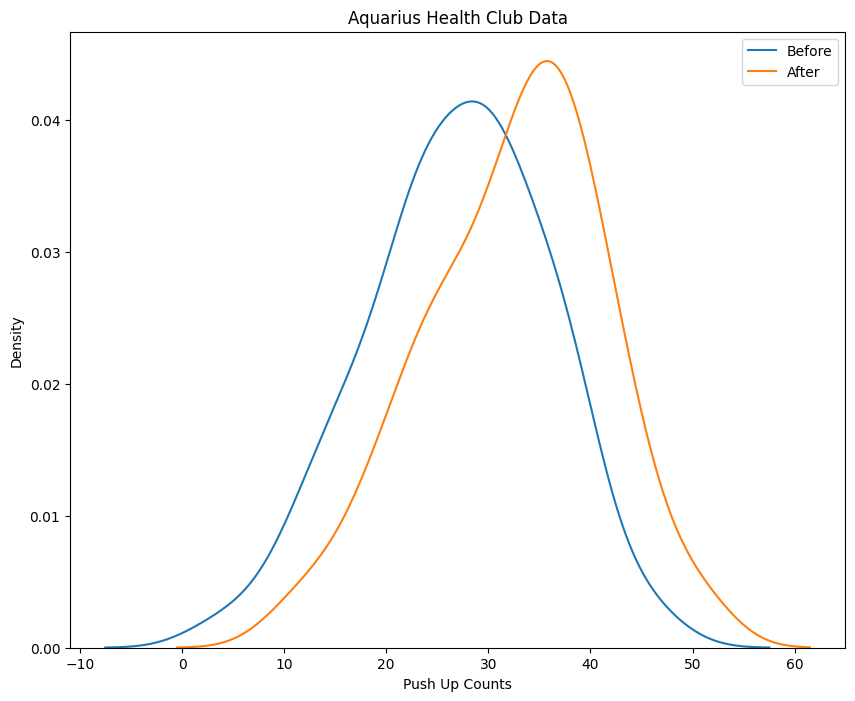

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
for i in aquarius_df.columns[1:]:
    sns.kdeplot(data=aquarius_df, x=i, ax=ax)
plt.legend(aquarius_df.columns[1:])
plt.title('Aquarius Health Club Data')
plt.xlabel('Push Up Counts')
plt.show();

#### 2. Whether the program is successful
As it is given the program is concluded to be successful, if a person can do 5 or more push ups than what they were doing before joining the program. So, this is a Paired t test situation.</br>
In a Paired t Test, we compare the differences of means between after and before the activity/process/program. For this, we will introduce another column in the dataset i.e Difference.

In [12]:
# calculate the difference 
aquarius_df['Difference'] = aquarius_df['After'] - aquarius_df['Before']

In [13]:
aquarius_df.head()

,Sr no.,Before,After,Difference
0,1,39,44,5
1,2,25,25,0
2,3,39,39,0
3,4,6,13,7
4,5,40,44,4


Stating the Null and Alternare Hypothesis:-</br>
The claim is about the program being successful, i.e. People are able to do at least 5 push ups after the program that further means our Null hypothesis would mean the program was not successful. For the program to be unsuccessful, the number of push ups done would be less than 5, so we can write that as less than or equal to 4. And so, our Alternate hypothesis would be mean of difference to be greater than 4 i.e. 5 or more.</br>
***
H<sub>0</sub>: $\mu$<sub>d</sub> <= 4</br>
H<sub>a</sub>: $\mu$<sub>d</sub> > 4
</br>
</br>
__$\alpha$ = 0.05__

In [14]:
alpha = 0.5
t, p_value = stats.ttest_1samp(
    aquarius_df['Difference'], # sample, in our case the computed Difference 
    popmean=4, # checking against 4 as per the stated hypothesis
    alternative='greater' # One-Tailed t Test for greater value than 4
)
check_hypothesis(p_value, alpha)

p_value: 2.3271721890386642e-07, alpha: 0.5
Reject the NULL Hypothesis


#### Conclusion
<b>We Reject the Null hypothesis and hence, Aquarius Health Club's claim about the success of the program is correct i.e. people joining the program are able to do at least 5 push ups more than what they were able to do before joining the program.</b>

### Metal Implants in Dental Cavities

In [15]:
# reading the data
dental_df = pd.read_excel('./Dental Hardness data-1.xlsx', sheet_name='Data')
dental_df.sample(5)

,Dentist,Method,Alloy,Temp,Response
14,1,3,1,1700,835
6,1,2,1,1500,782
20,2,1,1,1700,813
70,4,3,2,1600,813
74,5,1,1,1700,715


In [16]:
dental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


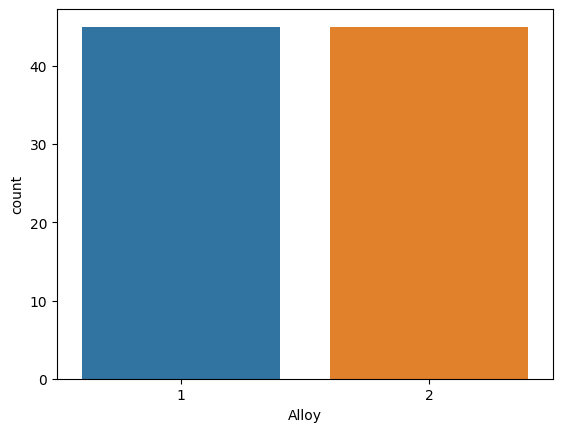

In [17]:
sns.countplot(data=dental_df, x='Alloy');

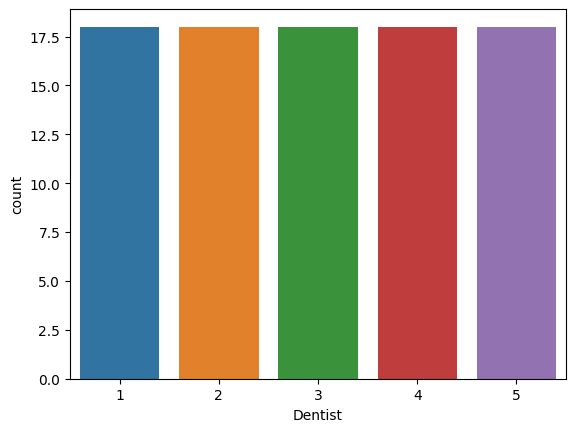

In [18]:
sns.countplot(data=dental_df, x='Dentist');

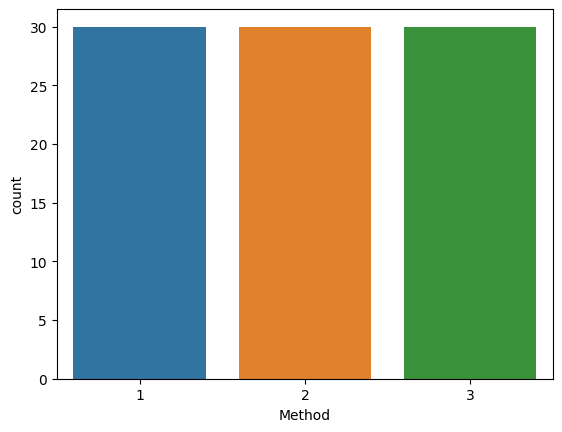

In [19]:
sns.countplot(data=dental_df, x='Method');

We need to conduct <b>test of ANOVA</b> differently for 2 alloys as number of Dentists are more than 2 and so is the number of Methods.

In [20]:
# different dataframes for different alloys
alloy_1_df = dental_df[dental_df.Alloy == 1]
alloy_2_df = dental_df[dental_df.Alloy == 2]

#### Assumptions for ANOVA
1. The responses for each factor level have a normal population distribution.
2. These distributions have the same variance.
3. The data are independent.

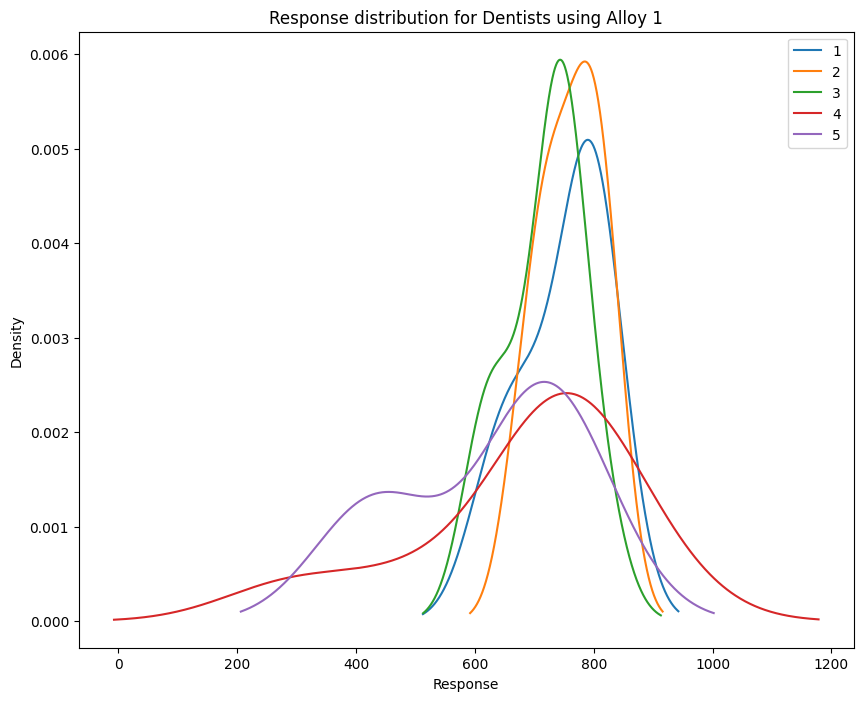

In [21]:
# Checking for Dentists for alloy 1
fig, ax = plt.subplots(figsize=(10,8))
var_dentist_alloy_1 = [] # variances for Response for all dentists for alloy 1
for i in alloy_1_df.Dentist.unique():
    alloy_1_df[alloy_1_df.Dentist == i].Response.plot(kind='kde')
    var_dentist_alloy_1.append(alloy_1_df[alloy_1_df.Dentist == i].Response.var())
plt.legend(alloy_1_df.Dentist.unique())
plt.xlabel('Response')
plt.title('Response distribution for Dentists using Alloy 1');

It looks like the assumptions are not fully correct for alloy 1 as the data is not normally distributed for some of the Dentists data for Response.

In [22]:
var_dentist_alloy_1

[5322.361111111111,
 2850.6944444444443,
 4169.277777777777,
 32646.61111111111,
 22460.25]

For variances as well, we notice that there is significant difference for 4th and 5th Dentist.

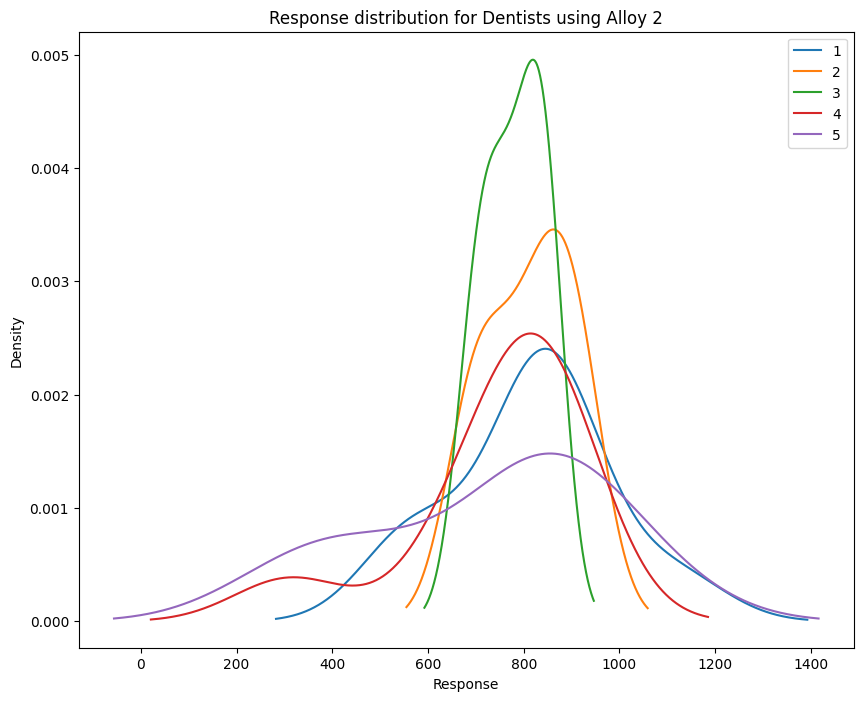

In [23]:
# Checking for Dentists for alloy 2
fig, ax = plt.subplots(figsize=(10,8))
var_dentist_alloy_2 = [] # variances for Response for all dentists for alloy 1
for i in alloy_2_df.Dentist.unique():
    alloy_2_df[alloy_2_df.Dentist == i].Response.plot(kind='kde')
    var_dentist_alloy_2.append(alloy_2_df[alloy_2_df.Dentist == i].Response.var())
plt.legend(alloy_2_df.Dentist.unique())
plt.xlabel('Response')
plt.title('Response distribution for Dentists using Alloy 2');

Same is the case for alloy 2, Dentists Response data is not normally distributed for some dentists.

In [24]:
var_dentist_alloy_2

[27719.194444444445,
 8433.361111111111,
 3991.75,
 32455.444444444445,
 62675.86111111111]

For variances too, the 1st, 4th and 5th have significant differences between their variances.

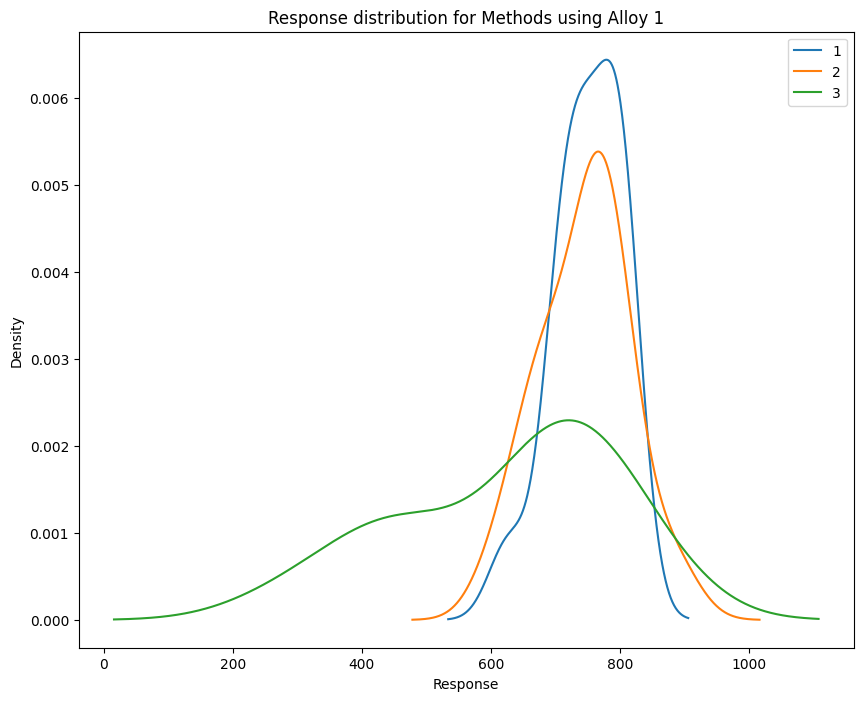

In [25]:
# Checking for Methods for alloy 1
fig, ax = plt.subplots(figsize=(10,8))
var_method_alloy_1 = [] # variances for Response for all dentists for alloy 1
for i in alloy_1_df.Method.unique():
    alloy_1_df[alloy_1_df.Method == i].Response.plot(kind='kde')
    var_method_alloy_1.append(alloy_1_df[alloy_1_df.Method == i].Response.var())
plt.legend(alloy_1_df.Method.unique())
plt.xlabel('Response')
plt.title('Response distribution for Methods using Alloy 1');

It looks like the assumptions are not fully correct for alloy 1 as the data is not normally distributed for some of the Methods data for Response. The 3rd one is not looking normal.

In [26]:
var_method_alloy_1

[2742.6952380952384, 4747.714285714285, 28067.095238095237]

And the variances show significant difference for the 3rd one.

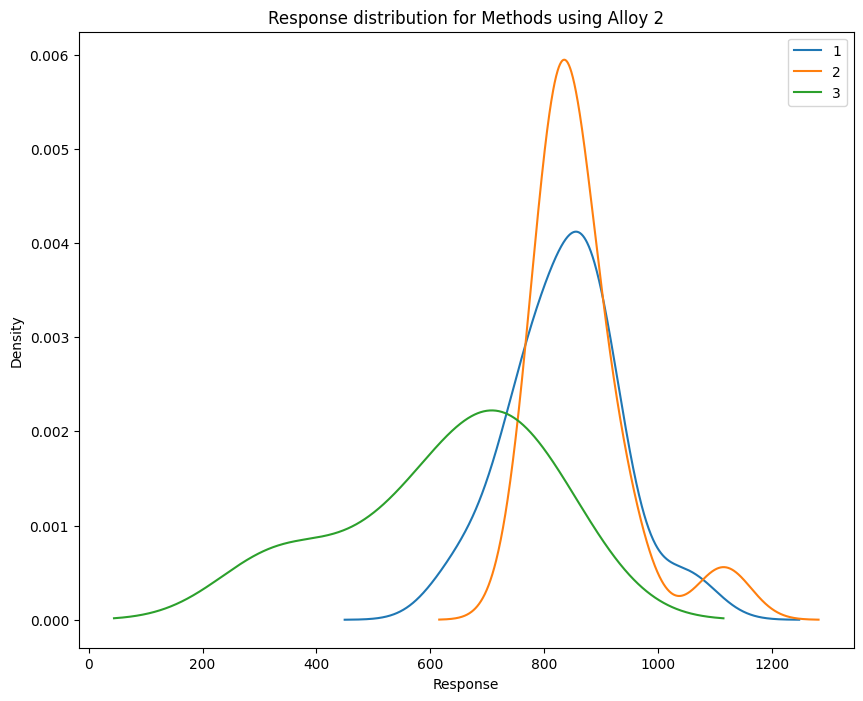

In [27]:
# Checking for Methods for alloy 2
fig, ax = plt.subplots(figsize=(10,8))
var_method_alloy_2 = [] # variances for Response for all dentists for alloy 1
for i in alloy_2_df.Method.unique():
    alloy_2_df[alloy_2_df.Method == i].Response.plot(kind='kde')
    var_method_alloy_2.append(alloy_2_df[alloy_2_df.Method == i].Response.var())
plt.legend(alloy_2_df.Method.unique())
plt.xlabel('Response')
plt.title('Response distribution for Methods using Alloy 2');

Same is the case for alloy 2 as the data is not normally distributed for one of the Methods data for Response. The 3rd one here too is not looking normal.

In [28]:
var_method_alloy_2

[8827.238095238095, 6707.809523809525, 30133.695238095235]

And the variances show significant difference for the 3rd one.

#### We will still proceed with ANOVA

#### 3.1 Is there any difference among the dentists on the implant hardness?
Stating the Null and Alternare Hypothesis:-</br>
The ask is about the difference between the Dentists on implant hardness, so our Null hypothesis will be there is no difference among the dentists. The Alternate hypothesis will be that there is a difference somewhere among the dentists, it could be between a single pair not being same or all of them are different than each other.</br>
***
H<sub>0</sub>: $\mu$<sub>1</sub> = $\mu$<sub>2</sub> = $\mu$<sub>3</sub> = $\mu$<sub>4</sub> = $\mu$<sub>5</sub></br>
H<sub>a</sub>: At least one pair of dentists differ
</br>
</br>
__$\alpha$ = 0.05__

In [29]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison  

In [30]:
# for alloy 1
formula = 'Response ~ C(Dentist)'
model = ols(formula, alloy_1_df).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


In [31]:
alpha = 0.05
f = aov_table.iloc[0,-2]
p_value = aov_table.iloc[0,-1]
check_hypothesis(p_value, alpha)

p_value: 0.11656712140267679, alpha: 0.05
Failed to Reject the NULL Hypothesis


Hence, we failed to prove that there is some difference between dentists regarding implant hardness for alloy 1. The Null hypothesis stands.

In [32]:
# for alloy 2
formula = 'Response ~ C(Dentist)'
model = ols(formula, alloy_2_df).fit()
aov_table = anova_lm(model)
print(aov_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


In [33]:
alpha = 0.05
f = aov_table.iloc[0,-2]
p_value = aov_table.iloc[0,-1]
check_hypothesis(p_value, alpha)

p_value: 0.7180309510793423, alpha: 0.05
Failed to Reject the NULL Hypothesis


Hence, we failed to prove that there is some difference between dentists regarding implant hardness for alloy 2. The Null hypothesis stands.

#### 3.2 Is there any difference among the Methods on the implant hardness?
Stating the Null and Alternare Hypothesis:-</br>
The ask is about the difference between the Methods on implant hardness, so our Null hypothesis will be there is no difference among the methods used. The Alternate hypothesis will be that there is a difference somewhere among the methods, it could be between a single pair not being same or all of them are different than each other.</br>
***
H<sub>0</sub>: $\mu$<sub>1</sub> = $\mu$<sub>2</sub> = $\mu$<sub>3</sub></br>
H<sub>a</sub>: At least one pair of methods differ
</br>
</br>
__$\alpha$ = 0.05__

In [34]:
# for alloy 1
formula = 'Response ~ C(Method)'
model = ols(formula, alloy_1_df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


In [35]:
alpha = 0.05
f = aov_table.iloc[0,-2]
p_value = aov_table.iloc[0,-1]
check_hypothesis(p_value, alpha)

p_value: 0.004163412167505518, alpha: 0.05
Reject the NULL Hypothesis


Hence, there is indeed some difference between the methods regarding implant hardness using alloy 1.

In [36]:
# To find the pairs, we can conduct Two-Sample tests for 2 methods at a time.
alloy1_methods_p_values = {}
_, alloy1_methods_p_values['1-2'] = stats.ttest_ind(
    alloy_1_df[alloy_1_df.Method==1].Response,
    alloy_1_df[alloy_1_df.Method==2].Response
)
_, alloy1_methods_p_values['1-3'] = stats.ttest_ind(
    alloy_1_df[alloy_1_df.Method==1].Response,
    alloy_1_df[alloy_1_df.Method==3].Response
)
_, alloy1_methods_p_values['2-3'] = stats.ttest_ind(
    alloy_1_df[alloy_1_df.Method==2].Response,
    alloy_1_df[alloy_1_df.Method==3].Response
)
print(alloy1_methods_p_values)

{'1-2': 0.7857410284661249, '1-3': 0.010231741528741947, '2-3': 0.017031154166139484}


As, observed from the p_values above, 1 and 3 have significant difference and so as 2 and 3. So, we can conclude that that the 3rd method is different from 1st and 2nd when we discuss implant hardness using alloy 1.

In [37]:
multiComp = MultiComparison(alloy_1_df['Response'], alloy_1_df['Method'])
tukeyres = multiComp.tukeyhsd(alpha = 0.05)
  
print(tukeyres)
print('Unique diet groups: ', multiComp.groupsunique)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------
Unique diet groups:  [1 2 3]


In [38]:
# for alloy 2
formula = 'Response ~ C(Method)'
model = ols(formula, alloy_2_df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


In [39]:
alpha = 0.05
f = aov_table.iloc[0,-2]
p_value = aov_table.iloc[0,-1]
check_hypothesis(p_value, alpha)

p_value: 5.4158710514431645e-06, alpha: 0.05
Reject the NULL Hypothesis


Hence, there is indeed some difference between the methods regarding implant hardness using alloy 2.

In [40]:
# To find the pairs, we can conduct Two-Sample tests for 2 methods at a time.
alloy2_methods_p_values = {}
_, alloy2_methods_p_values['1-2'] = stats.ttest_ind(
    alloy_2_df[alloy_2_df.Method==1].Response,
    alloy_2_df[alloy_2_df.Method==2].Response
)
_, alloy2_methods_p_values['1-3'] = stats.ttest_ind(
    alloy_2_df[alloy_2_df.Method==1].Response,
    alloy_2_df[alloy_2_df.Method==3].Response
)
_, alloy2_methods_p_values['2-3'] = stats.ttest_ind(
    alloy_2_df[alloy_2_df.Method==2].Response,
    alloy_2_df[alloy_2_df.Method==3].Response
)
print(alloy2_methods_p_values)

{'1-2': 0.4085849072654052, '1-3': 0.0003238382212175932, '2-3': 5.3750008985787245e-05}


As, observed from the p_values above, 1 and 3 have significant difference and so as 2 and 3. So, we can conclude that that the 3rd method is different from 1st and 2nd when we discuss implant hardness using alloy 2.

In [41]:
multiComp = MultiComparison(alloy_2_df['Response'], alloy_2_df['Method'])
tukeyres = multiComp.tukeyhsd(alpha = 0.05)
  
print(tukeyres)
print('Unique diet groups: ', multiComp.groupsunique)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------
Unique diet groups:  [1 2 3]


<h4> THE END! </h4>